In [55]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
#한글을 출력하기 위한 import
#한글 font를 설정해준다.
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문

# 데이터 준비

In [56]:
# 훈련, 데이터 csv 파일 읽어오기

train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# 데이터 형태 , 상위 데이터 출력
train.shape
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [57]:
# 데이터 정보 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [58]:
#결측치 확인
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# EDA

In [59]:
#필요없는 특징 제거 ( imdb_id, poster_path)

train.drop(['imdb_id', 'poster_path'], axis=1, inplace = True)
test.drop(['imdb_id', 'poster_path'], axis=1, inplace = True)


### 1-1 Homepage 에 따른 수익률


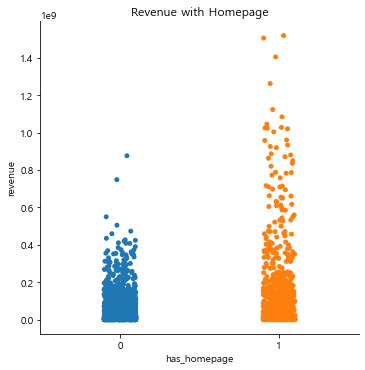

In [60]:
#홈페이지가 있는 경우 1로 데이터값을 변경한다.
train['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train['homepage']]
test['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test['homepage']]

sns.catplot(x = 'has_homepage', y = 'revenue', data=train)
plt.title('Revenue with Homepage')

# 홈페이지가 있는 경우에 수익률이 더 높은것을 확인가능


#사용한 특성은 제거해준다.
train = train.drop(['homepage'],axis=1)
test = test.drop(['homepage'], axis=1)

### 1-2 Collection에 따른 수익률

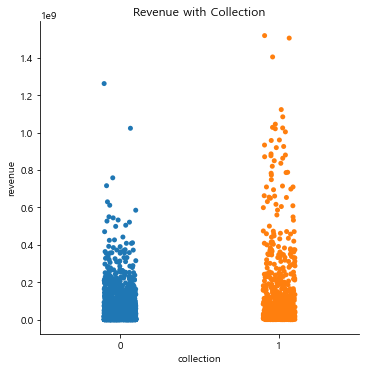

In [61]:
# 영화 모음집 유무에 따라 1,0으로 매핑
train['collection'] = [0 if pd.isnull(x) else 1 for x in 
                       train['belongs_to_collection']]
test['collection'] = [0 if pd.isnull(x) else 1 for x in 
                      test['belongs_to_collection']]

sns.catplot(x = 'collection', y = 'revenue', data=train)
plt.title('Revenue with Collection')

#Collection이 있으면 수익률이 증가하는 것을 확인

#사용한 특성은 제거해준다.
train = train.drop(['belongs_to_collection'],axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

### 1-3 장르에 따른 수익률

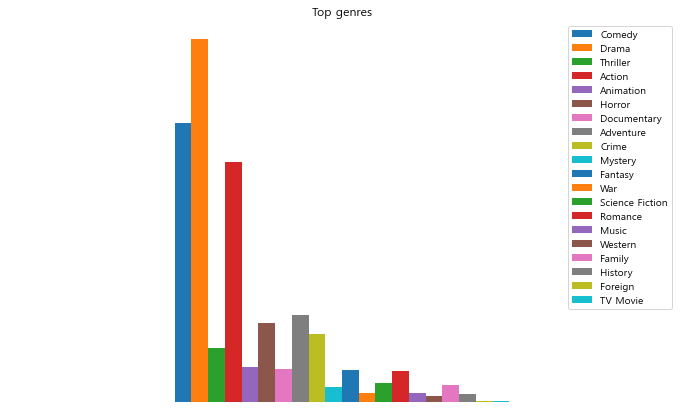

In [62]:
from wordcloud import WordCloud

#장르와 해당 장르의 갯수를 파악한다.
genres = {}
for i in train['genres'] :
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in genres :
            genres[eval(i)[0]['name']] = 1
        else :
            genres[eval(i)[0]['name']] +=1

            
df = pd.DataFrame([genres])
df.index = ['top genres']
df.plot(kind = 'bar', stacked = False, figsize = (12,7))
plt.title('Top genres')
plt.axis('off')
plt.show()

#drama, comedy, action 순으로 많은 것을 확인할 수 있다.

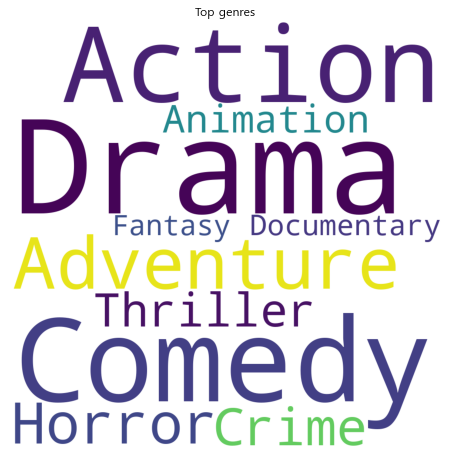

In [63]:
#Worldcloud 형태의 장르 순위
from collections import OrderedDict


plt.figure(figsize=(12, 8))
wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=10, relative_scaling=0.5,
                      normalize_plurals=False).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()
genres = OrderedDict(genres)

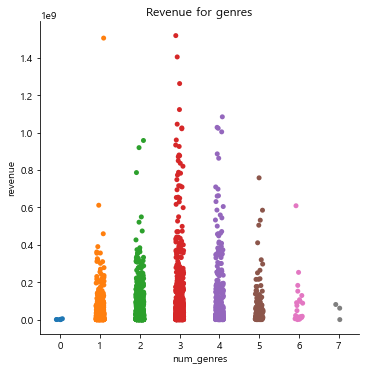

In [64]:
# 영화속에 포함된 장르의 갯수에 따른 수익률

genres_count=[]
for i in train['genres']:
    if(not(pd.isnull(i))):
        genres_count.append(len(eval(i)))       
    else:
        genres_count.append(0)
        
train['num_genres'] = genres_count

sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for genres');

# 한 영화에 장르가 3개인 경우 가장 많은 수익률을 낸 것을 확인 가능

In [65]:
#나중을 위해 테스트 데이터도 영화속 장르와 수익의 관계를 확인하기 위한 코드
genres_count_test=[]
for i in test['genres']:
    if(not(pd.isnull(i))):        
        genres_count_test.append(len(eval(i)))        
    else:
        genres_count_test.append(0)
test['num_genres'] = genres_count_test

# 사용한 특성 제거
train.drop(['genres'],axis=1, inplace = True)
test.drop(['genres'],axis=1, inplace = True)

### 1-4 제작사 나라 다양성 에 따른 수익률

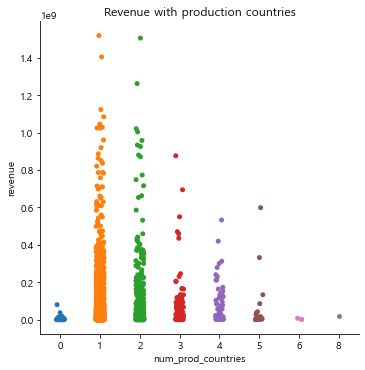

In [66]:
# 몇개의 나라가 협찬을 해줬는지 확인하기 위한 코드
prod_coun_count=[]
for i in train['production_countries']:
    if(not(pd.isnull(i))):
        prod_coun_count.append(len(eval(i)))
    else:
        prod_coun_count.append(0)
train['num_prod_countries'] = prod_coun_count

prod_coun_count=[]
for i in test['production_countries']:
    if(not(pd.isnull(i))):
        prod_coun_count.append(len(eval(i)))
    else:
        prod_coun_count.append(0)
test['num_prod_countries'] = prod_coun_count

# 협찬해주는 나라 갯수에 따른 수익률 
sns.catplot(x='num_prod_countries', y='revenue', data=train);
plt.title('Revenue with production countries');

# 1~6개 나라에서 협찬을 할 때 순서로 수익이 높은것을 확인


# 사용한 특성 제거
train.drop(['production_countries'],axis=1, inplace = True)
test.drop(['production_countries'],axis=1, inplace = True)

### 1-5 제작사 협찬에 따른 수익률

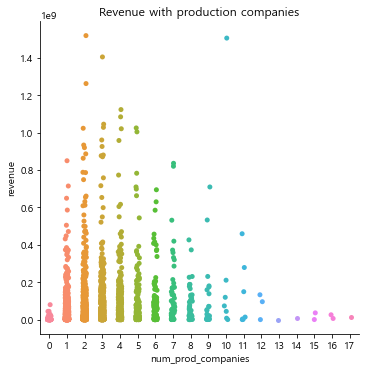

In [67]:
#제작사 협찬 갯수를 확인하기 위한 코드
prod_coun_count=[]
for i in train['production_companies']:
    if(not(pd.isnull(i))):
        prod_coun_count.append(len(eval(i)))
    else:
        prod_coun_count.append(0)
train['num_prod_companies'] = prod_coun_count


prod_coun_count=[]
for i in test['production_companies']:
    if(not(pd.isnull(i))):
        prod_coun_count.append(len(eval(i)))
    else:
        prod_coun_count.append(0)
test['num_prod_companies'] = prod_coun_count

# 협찬해주는 나라 갯수에 따른 수익률 
sns.catplot(x='num_prod_companies', y='revenue', data=train);
plt.title('Revenue with production companies');

# 1~4 개의 회사가 협찬할 때 수익률이 가장 높은것을 확인


# 사용한 특성 제거
train.drop(['production_companies'],axis=1, inplace = True)
test.drop(['production_companies'],axis=1, inplace = True)

### 1-6 Overview(개요)에 따른 수익률

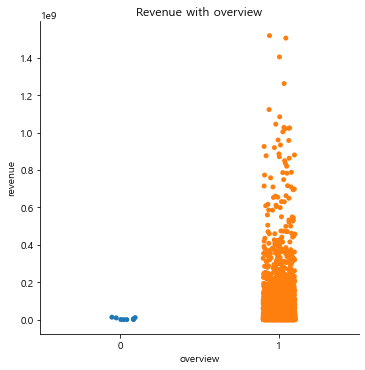

In [68]:
#overview 유무에 따른 0,1로 데이터 값 변환
train['overview'] = [0 if pd.isnull(x) else 1 for x in train['overview']]
test['overview'] = [0 if pd.isnull(x) else 1 for x in test['overview']]

sns.catplot(x='overview', y='revenue', data=train);
plt.title('Revenue with overview');

#개요가 있을때가 수익률이 극적으로 높은것을 확인

train = train.drop(['overview'], axis=1)
test = test.drop(['overview'], axis=1)

### 1-7 출연진 수에 따른 수익률

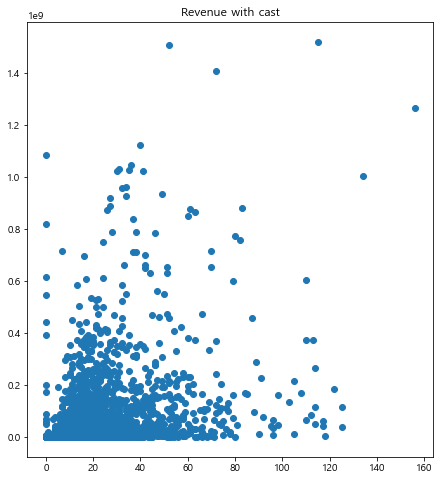

In [69]:
#영화마다 출연진 수를 확인하기 위한 코드
total_cast=[]
for i in train['cast']:
    if(not(pd.isnull(i))):
        total_cast.append(len(eval(i)))
    else:
        total_cast.append(0)
train['cast_count'] = total_cast

total_cast=[]
for i in test['cast']:
    if(not(pd.isnull(i))):
        total_cast.append(len(eval(i)))
    else:
        total_cast.append(0)
test['cast_count'] = total_cast

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(train['cast_count'], train['revenue'])
plt.title('Revenue with cast')

#출연자수가 적을수록 수익률이 높은것을 확인

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

### 1-7.2 영화 제작한 참여 인원 수에 따른 수익률


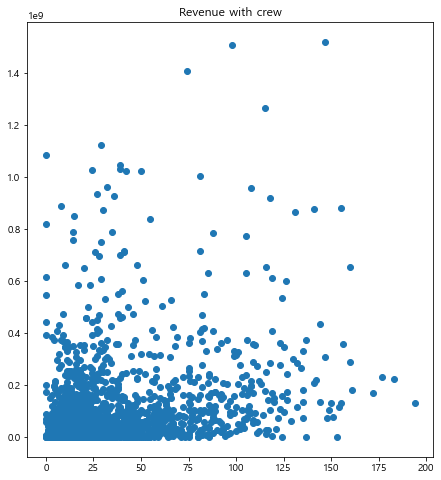

In [70]:
#영화마다 출연진 수를 확인하기 위한 코드
total_crew=[]
for i in train['crew']:
    if(not(pd.isnull(i))):
        total_crew.append(len(eval(i)))
    else:
        total_crew.append(0)
train['crew_count'] = total_crew

total_crew=[]
for i in test['crew']:
    if(not(pd.isnull(i))):
        total_crew.append(len(eval(i)))
    else:
        total_crew.append(0)
test['crew_count'] = total_crew


plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(train['crew_count'], train['revenue'])
plt.title('Revenue with crew')

#출연자수가 적을수록 수익률이 높은것을 확인

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

### 1-8 영화 언어에 따른 수익률

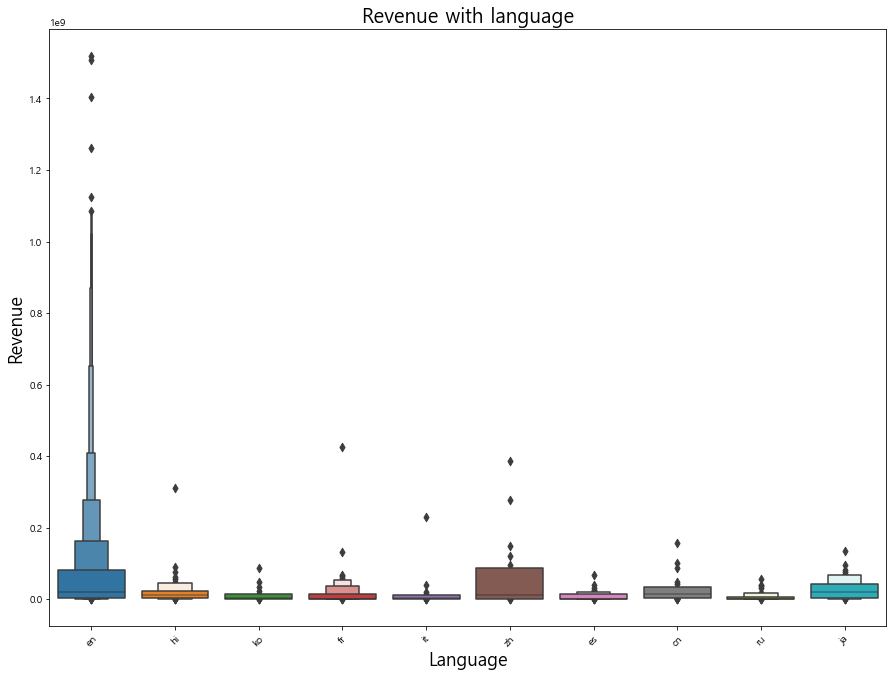

In [71]:
plt.figure(figsize=(15,11))

#영화 언어와 해당 언어의 수익률을 정리한다.
gl = sns.boxenplot(x='original_language', y='revenue',
                   data=train[(train['original_language']
                               .isin((train['original_language']
                                .sort_values().value_counts()[:10]
                                .index.values)))])

gl.set_title('Revenue with language', fontsize=20)
gl.set_xticklabels(gl.get_xticklabels(),rotation=45)
gl.set_xlabel('Language',fontsize=18)
gl.set_ylabel('Revenue',fontsize=18)

# 영어(en), 중국어(zh) 순으로 수익이 높은것을 확인

# 대부분의 영화가 영어와 중국어 이므로 
# origianl_language 특성을 영어 = 1 , 중국어 = 0 으로 매핑해주었다.
train['original_language'] = train['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))
test['original_language'] = test['original_language'].apply(lambda x: 1 if x=='en' else(2 if x=='zh' else 0))


### 1-9 예산, 인기도, 런타임, 수익성 히트맵

<AxesSubplot:>

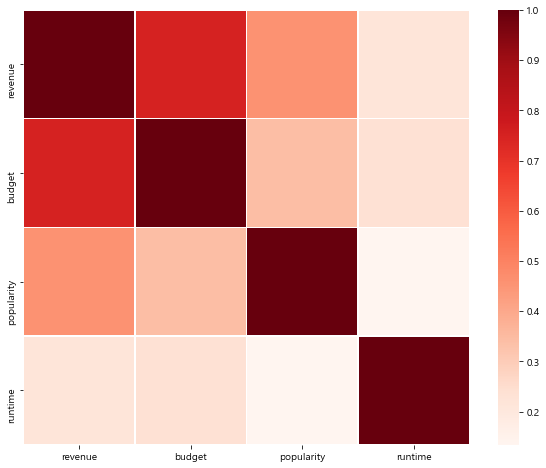

In [72]:
# 각 특성들의 상관관계를 확인하기 위해 히트맵을 이용한다.
# revenue, budget, popularity, runtime 간의 상관관계를 확인해본다.

col = ['revenue', 'budget', 'popularity', 'runtime']
plt.subplots(figsize=(10,8))
corr = train[col].corr()
sns.heatmap(corr, xticklabels = col, yticklabels=col, linewidths=.5, cmap='Reds')

# 색이 진할수록 상관관계가 크다는 것을 알 수 있다.
# revenue 는 budget의 영향을 크게 받는 다는 것을 확인
# runtime과 popularity는 상관관계가 거의 없다는 것을 확인

<AxesSubplot:xlabel='budget', ylabel='revenue'>

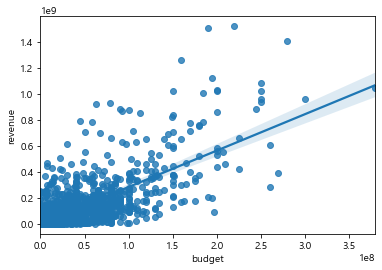

In [73]:
#위에서 budget과 revenue에 큰 영향을 미치는 것을 그래프로 확인해본다.
sns.regplot(x='budget', y='revenue', data=train)

### 1-10 Tag Line(표어)에 따른 수익률 

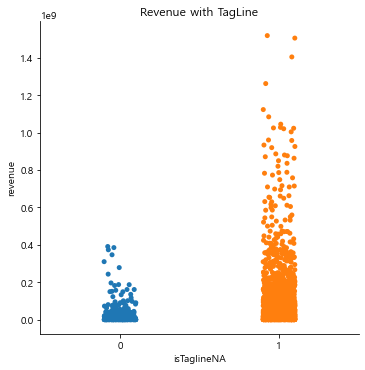

In [74]:

# 태그가 있으면 1, 없으면 0으로 매핑
train['isTaglineNA'] = 0
train.loc[train['tagline'].isnull() == False, 'isTaglineNA'] = 1

test['isTaglineNA'] = 0
test.loc[test['tagline'].isnull() == False, 'isTaglineNA'] = 1

sns.catplot(x='isTaglineNA', y='revenue', data=train)
plt.title('Revenue with TagLine')


# 태그라인이 수익에 많은 영향을 미치고 있는것을 확인 가능

train.drop(['tagline'], axis=1, inplace = True)
test.drop(['tagline'], axis=1, inplace = True)

### 1-11 런타임 Feature Engineering

In [75]:
# 'runtime'에 평균 값을 넣어준다.
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(test['runtime'].mean())

### 1-12 더빙 언어

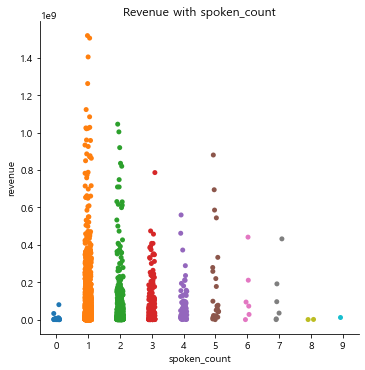

In [76]:
# 각 영화의 더빙 언어 갯수를 확인하기 위한 매핑작업
spoken_count=[]
for i in train['spoken_languages']:
    if(not(pd.isnull(i))):
        spoken_count.append(len(eval(i)))
    else:
        spoken_count.append(0)
train['spoken_count'] = spoken_count

spoken_count_test=[]
for i in test['spoken_languages']:
    if(not(pd.isnull(i))):
        spoken_count_test.append(len(eval(i)))
    else:
        spoken_count_test.append(0)
test['spoken_count'] = spoken_count_test

# 각영화에 따른 더빙언어 갯수와 수익 그래프를 그린다.
sns.catplot(x='spoken_count', y='revenue', data=train);
plt.title('Revenue with spoken_count');

# 더빙언어 갯수가 1개부터 적을 수록 수익이 높은 것을 확인
train.drop(['spoken_languages'], axis=1, inplace=True)
test.drop(['spoken_languages'], axis=1, inplace=True)


### 1-13 상영날짜

C:\Users\12zzz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

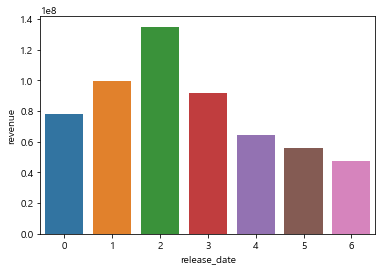

In [77]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(train['release_date'])

release_day = train['release_date'].value_counts().sort_index()
release_day_revenue = train.groupby(['release_date'])['revenue'].sum()
release_day_revenue.index = release_day_revenue.index.dayofweek
sns.barplot(release_day_revenue.index, release_day_revenue, data=train, ci=None)
plt.show

In [78]:
train['release_day'] = train['release_date'].dt.dayofweek
test['release_day'] = test['release_date'].dt.dayofweek


In [79]:
test['release_day'] = test['release_day'].fillna(0)
train.drop(['release_date'], axis=1, inplace=True)
test.drop(['release_date'], axis=1, inplace=True)

In [80]:
#필요없는 특징 삭제
train=train.drop(['Keywords'], axis=1)
test=test.drop(['Keywords'], axis=1)
train.drop(['original_title', 'status','title'], axis=1, inplace = True)
test.drop(['original_title', 'status','title'], axis=1, inplace = True)


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3000 non-null   int64  
 1   budget              3000 non-null   int64  
 2   original_language   3000 non-null   int64  
 3   popularity          3000 non-null   float64
 4   runtime             3000 non-null   float64
 5   revenue             3000 non-null   int64  
 6   has_homepage        3000 non-null   int64  
 7   collection          3000 non-null   int64  
 8   num_genres          3000 non-null   int64  
 9   num_prod_countries  3000 non-null   int64  
 10  num_prod_companies  3000 non-null   int64  
 11  cast_count          3000 non-null   int64  
 12  crew_count          3000 non-null   int64  
 13  isTaglineNA         3000 non-null   int64  
 14  spoken_count        3000 non-null   int64  
 15  release_day         3000 non-null   int64  
dtypes: flo

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4398 non-null   int64  
 1   budget              4398 non-null   int64  
 2   original_language   4398 non-null   int64  
 3   popularity          4398 non-null   float64
 4   runtime             4398 non-null   float64
 5   has_homepage        4398 non-null   int64  
 6   collection          4398 non-null   int64  
 7   num_genres          4398 non-null   int64  
 8   num_prod_countries  4398 non-null   int64  
 9   num_prod_companies  4398 non-null   int64  
 10  cast_count          4398 non-null   int64  
 11  crew_count          4398 non-null   int64  
 12  isTaglineNA         4398 non-null   int64  
 13  spoken_count        4398 non-null   int64  
 14  release_day         4398 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 515.5 KB


In [111]:
train.corr().revenue

id                    0.000610
budget                0.752965
original_language     0.141119
popularity            0.461460
runtime               0.216363
revenue               1.000000
has_homepage          0.263179
collection            0.339425
num_genres            0.163654
num_prod_countries    0.052955
num_prod_companies    0.155700
cast_count            0.335737
crew_count            0.372110
isTaglineNA           0.180366
spoken_count          0.064961
release_day          -0.140494
Name: revenue, dtype: float64

### Budget 정규화

In [122]:
a , b = 1, 100
m, n = train.budget.min(), train.budget.max()
train['budget'] = (train.budget - m ) / (n - m) * (b - a) + a

### Modeling

In [123]:
y = train['revenue'].values
cols = [col for col in train.columns if col not in ['revenue', 'id']]
X = train[cols].values
y = np.log1p(y)

### Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
clf = LinearRegression()
scores = cross_val_score(clf,X,y, scoring = 'neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print('Linear Regression rmse:' , rmse_scores.mean())

Linear Regression rmse: 2.346794275811749


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 10, min_samples_split=5, random_state=0, n_estimators=100)
scores = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print('Random Forest rmse:', rmse_scores.mean())

Random Forest rmse: 2.2393895997083533


### XGBoost

In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth = 10, min_samples_split=5, random_state=0, n_estimators=100)
scores = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print('XGBoost rmse:', rmse_scores.mean())

[16:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:24:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameter

In [132]:
cols = [col for col in test.columns if col not in ['id']]
X_test = test[cols].values

### Submission 생성

In [128]:
regr.fit(X,y)
y_pred = regr.predict(X_test)
y_pred = np.expm1(y_pred)
pd.DataFrame({"id": test.id, 'revenue':y_pred}).to_csv('submission_RF.csv', index=False)

In [130]:
clf.fit(X,y)
y_pred = clf.predict(X_test)
pd.DataFrame({"id": test.id, 'revenue':y_pred}).to_csv('submission_clf.csv', index=False)

In [134]:
xgb.fit(X,y)
y_pred = xgb.predict(X_test)
y_pred = np.expm1(y_pred)
pd.DataFrame({"id": test.id, 'revenue':y_pred}).to_csv('submission_XGB.csv', index=False)

[16:28:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


